# Model development

Apply the model for small instances (e.g. 6 facilities, and 10 oil spills in Hudson)++

Outline of this script:
1. Input data
2. Optimization Model
3. Output in a form of Network Diagram

# Data

In [1]:
# import custom functions
import data_preparation
import custom_func
import model
import model_analysis
# import libraries
import pandas as pd
import geopandas as gpd

In [2]:
# Import data
spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
# spill_data = spill_data.sample(n=100)
station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
#station_data = station_data.iloc[[7,9,10, 13,15,16, 18]] # for small scale problem, we select stations nearby Hudson Bay & Strait
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
# spill_data.to_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills')
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()


In [4]:
display(spill_data)
display(station_data)

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
0,73,o74,"(64.50421666200003, -79.40601964599995)",8500,Large,425.0,CDU,0,800,0
1,97,o98,"(73.85872545439102, -77.06292927588505)",4820,Large,241.0,MCR,54,0,0
2,52,o53,"(58.851133884186325, -94.20693472697955)",3200,Large,160.0,ISB,0,0,257
3,177,o178,"(69.45553911240434, -123.85642478117892)",6160,Large,308.0,MCR,54,0,0
4,202,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
...,...,...,...,...,...,...,...,...,...,...
95,206,o207,"(61.2787986028355, -114.41660450627202)",6480,Large,324.0,MCR,54,0,0
96,42,o43,"(70.5897855138361, -120.20613457011686)",5790,Large,289.5,ISB,0,0,257
97,191,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257
98,173,o174,"(72.04548849091111, -119.40991256546548)",800,Small,40.0,CDU,0,100,0


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


## Input parameters

In [5]:
# %% One value
NumberStMax = 5
DistanceMax = 200 # (DistanceMax*80)km  convert it to kilometer, typical speed 20km/hr -> 480km/day
TimeRMax = 220  # covert it into hours or minutes

In [6]:
BigM = 5000000
current_vs_proposed = 'proposed' # current
MaxF = 3
Budget = 20000000

In [7]:
# 
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)

['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20']


In [8]:
max(Distance.values())

82.62173596329828

In [9]:
print('coordinates_st')
display(coordinates_st)

print('Demand')
display(Demand)
print('Availability')
display(Availability)
print('Eff')
display(Eff)

print('Distance')
display(Distance)

print('TimeR')
display(TimeR)

print('Cf_s'); display(Cf_s)
print('Cu_sor')
display(Cu_sor)

coordinates_st


([[70.0, -134.0],
  [70.63999938964844, -119.43000030517578],
  [67.08999633789062, -112.31999969482422],
  [62.599998474121094, -113.19000244140625],
  [60.529998779296875, -114.37999725341797],
  [68.86000061035156, -103.19000244140625],
  [63.93000030517578, -101.13999938964844],
  [60.060001373291016, -95.88999938964844],
  [75.11000061035156, -95.70999908447266],
  [63.029998779296875, -91.73999786376953],
  [62.66999816894531, -92.70800018310547],
  [73.4000015258789, -88.16000366210938],
  [73.4000015258789, -81.83000183105469],
  [64.2020034790039, -83.91000366210938],
  [71.70999908447266, -74.97000122070312],
  [67.66999816894531, -76.37999725341797],
  [64.62000274658203, -77.41000366210938],
  [68.93000030517578, -69.16999816894531],
  [63.150001525878906, -69.68000030517578],
  [68.93000030517578, -65.56999969482422]],
 {'s1': [70.0, -134.0],
  's2': [70.63999938964844, -119.43000030517578],
  's3': [67.08999633789062, -112.31999969482422],
  's4': [62.599998474121094, -11

Demand


{('o74', 'm'): 20,
 ('o74', 'c'): 0,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 100,
 ('o53', 'c'): 0,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 2,
 ('o203', 'c'): 0,
 ('o203', 'i'): 0,
 ('o127', 'm'): 2,
 ('o127', 'c'): 0,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 20,
 ('o51', 'c'): 0,
 ('o51', 'i'): 0,
 ('o7', 'm'): 20,
 ('o7', 'c'): 0,
 ('o7', 'i'): 0,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 0,
 ('o221', 'c'): 110,
 ('o221', 'i'): 0,
 ('o64', 'm'): 20,
 ('o64', 'c'): 0,
 ('o64', 'i'): 0,
 ('o25', 'm'): 0,
 ('o25', 'c'): 31,
 ('o25', 'i'): 0,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 0,
 ('o148', 'c'): 0,
 ('o148', 'i'): 7,
 ('o208', 'm'): 100,
 ('o208', 'c'): 0,
 ('o208', 'i'): 0,
 ('o86', 'm'): 100,
 ('o86', 'c'): 0,
 ('o8

Availability


{('s1', 'm'): 180000.0,
 ('s1', 'c'): 160000.0,
 ('s1', 'i'): 80000.0,
 ('s2', 'm'): 180000.0,
 ('s2', 'c'): 40000.0,
 ('s2', 'i'): 40000.0,
 ('s3', 'm'): 140000.0,
 ('s3', 'c'): 60000.0,
 ('s3', 'i'): 80000.0,
 ('s4', 'm'): 200000.0,
 ('s4', 'c'): 180000.0,
 ('s4', 'i'): 180000.0,
 ('s5', 'm'): 160000.0,
 ('s5', 'c'): 100000.0,
 ('s5', 'i'): 120000.0,
 ('s6', 'm'): 40000.0,
 ('s6', 'c'): 140000.0,
 ('s6', 'i'): 200000.0,
 ('s7', 'm'): 200000.0,
 ('s7', 'c'): 80000.0,
 ('s7', 'i'): 80000.0,
 ('s8', 'm'): 120000.0,
 ('s8', 'c'): 40000.0,
 ('s8', 'i'): 120000.0,
 ('s9', 'm'): 40000.0,
 ('s9', 'c'): 180000.0,
 ('s9', 'i'): 40000.0,
 ('s10', 'm'): 180000.0,
 ('s10', 'c'): 80000.0,
 ('s10', 'i'): 40000.0,
 ('s11', 'm'): 100000.0,
 ('s11', 'c'): 60000.0,
 ('s11', 'i'): 120000.0,
 ('s12', 'm'): 80000.0,
 ('s12', 'c'): 200000.0,
 ('s12', 'i'): 40000.0,
 ('s13', 'm'): 200000.0,
 ('s13', 'c'): 200000.0,
 ('s13', 'i'): 100000.0,
 ('s14', 'm'): 180000.0,
 ('s14', 'c'): 160000.0,
 ('s14', 'i'): 600

Eff


{('s1', 'm'): 0.4,
 ('s1', 'c'): 0.9,
 ('s1', 'i'): 0.8,
 ('s2', 'm'): 0.5,
 ('s2', 'c'): 0.9,
 ('s2', 'i'): 0.30000000000000004,
 ('s3', 'm'): 0.4,
 ('s3', 'c'): 0.5,
 ('s3', 'i'): 0.7000000000000001,
 ('s4', 'm'): 0.4,
 ('s4', 'c'): 0.8,
 ('s4', 'i'): 1.0,
 ('s5', 'm'): 0.30000000000000004,
 ('s5', 'c'): 0.1,
 ('s5', 'i'): 0.7000000000000001,
 ('s6', 'm'): 0.1,
 ('s6', 'c'): 0.4,
 ('s6', 'i'): 0.1,
 ('s7', 'm'): 0.5,
 ('s7', 'c'): 1.0,
 ('s7', 'i'): 0.6000000000000001,
 ('s8', 'm'): 0.5,
 ('s8', 'c'): 0.6000000000000001,
 ('s8', 'i'): 1.0,
 ('s9', 'm'): 0.2,
 ('s9', 'c'): 0.2,
 ('s9', 'i'): 0.2,
 ('s10', 'm'): 0.5,
 ('s10', 'c'): 0.9,
 ('s10', 'i'): 0.4,
 ('s11', 'm'): 0.5,
 ('s11', 'c'): 0.8,
 ('s11', 'i'): 0.8,
 ('s12', 'm'): 0.5,
 ('s12', 'c'): 0.9,
 ('s12', 'i'): 0.8,
 ('s13', 'm'): 0.5,
 ('s13', 'c'): 0.8,
 ('s13', 'i'): 0.8,
 ('s14', 'm'): 0.5,
 ('s14', 'c'): 0.9,
 ('s14', 'i'): 0.7000000000000001,
 ('s15', 'm'): 0.30000000000000004,
 ('s15', 'c'): 0.30000000000000004,
 ('s15',

Distance


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

TimeR


{('o74', 's1'): 54.869901934884496,
 ('o74', 's2'): 40.49156344567654,
 ('o74', 's3'): 33.01539383228145,
 ('o74', 's4'): 33.83760408289111,
 ('o74', 's5'): 35.19905444057435,
 ('o74', 's6'): 24.179549221206393,
 ('o74', 's7'): 21.741562470949656,
 ('o74', 's8'): 17.072568947254137,
 ('o74', 's9'): 19.449994856605564,
 ('o74', 's10'): 12.421767498345352,
 ('o74', 's11'): 13.427844700607151,
 ('o74', 's12'): 12.4806713018879,
 ('o74', 's13'): 9.2201208377404,
 ('o74', 's14'): 4.514110434032932,
 ('o74', 's15'): 8.46176922169844,
 ('o74', 's16'): 4.379380986759691,
 ('o74', 's17'): 1.9993727886691577,
 ('o74', 's18'): 11.151847626729145,
 ('o74', 's19'): 9.819846535019586,
 ('o74', 's20'): 14.526631698365959,
 ('o98', 's1'): 57.067679328992526,
 ('o98', 's2'): 42.489164310609084,
 ('o98', 's3'): 35.90093126483362,
 ('o98', 's4'): 37.840778519494805,
 ('o98', 's5'): 39.6259851186469,
 ('o98', 's6'): 26.600964621532054,
 ('o98', 's7'): 26.043905369333796,
 ('o98', 's8'): 23.34231052534236,

Cf_s


{'s1': 80000.0,
 's2': 80000.0,
 's3': 20000.0,
 's4': 90000.0,
 's5': 30000.0,
 's6': 20000.0,
 's7': 10000.0,
 's8': 20000.0,
 's9': 80000.0,
 's10': 50000.0,
 's11': 40000.0,
 's12': 100000.0,
 's13': 80000.0,
 's14': 10000.0,
 's15': 90000.0,
 's16': 30000.0,
 's17': 50000.0,
 's18': 40000.0,
 's19': 100000.0,
 's20': 70000.0}

Cu_sor


{('s1', 'o74', 'm'): 54.869901934884496,
 ('s1', 'o74', 'c'): 109.73980386976899,
 ('s1', 'o74', 'i'): 164.6097058046535,
 ('s2', 'o74', 'm'): 40.49156344567654,
 ('s2', 'o74', 'c'): 80.98312689135308,
 ('s2', 'o74', 'i'): 121.47469033702961,
 ('s3', 'o74', 'm'): 33.01539383228145,
 ('s3', 'o74', 'c'): 66.0307876645629,
 ('s3', 'o74', 'i'): 99.04618149684434,
 ('s4', 'o74', 'm'): 33.83760408289111,
 ('s4', 'o74', 'c'): 67.67520816578222,
 ('s4', 'o74', 'i'): 101.51281224867333,
 ('s5', 'o74', 'm'): 35.19905444057435,
 ('s5', 'o74', 'c'): 70.3981088811487,
 ('s5', 'o74', 'i'): 105.59716332172306,
 ('s6', 'o74', 'm'): 24.179549221206393,
 ('s6', 'o74', 'c'): 48.35909844241279,
 ('s6', 'o74', 'i'): 72.53864766361917,
 ('s7', 'o74', 'm'): 21.741562470949656,
 ('s7', 'o74', 'c'): 43.48312494189931,
 ('s7', 'o74', 'i'): 65.22468741284897,
 ('s8', 'o74', 'm'): 17.072568947254137,
 ('s8', 'o74', 'c'): 34.145137894508274,
 ('s8', 'o74', 'i'): 51.21770684176241,
 ('s9', 'o74', 'm'): 19.449994856

In [10]:
OilSpills

['o74',
 'o98',
 'o53',
 'o178',
 'o203',
 'o127',
 'o172',
 'o51',
 'o7',
 'o30',
 'o221',
 'o64',
 'o25',
 'o94',
 'o119',
 'o148',
 'o208',
 'o86',
 'o93',
 'o108',
 'o131',
 'o6',
 'o10',
 'o41',
 'o144',
 'o169',
 'o185',
 'o87',
 'o168',
 'o24',
 'o190',
 'o97',
 'o162',
 'o106',
 'o157',
 'o175',
 'o136',
 'o145',
 'o3',
 'o28',
 'o45',
 'o27',
 'o219',
 'o9',
 'o212',
 'o139',
 'o214',
 'o113',
 'o160',
 'o191',
 'o104',
 'o184',
 'o37',
 'o165',
 'o83',
 'o114',
 'o155',
 'o91',
 'o138',
 'o183',
 'o11',
 'o181',
 'o159',
 'o48',
 'o129',
 'o158',
 'o117',
 'o153',
 'o101',
 'o44',
 'o109',
 'o59',
 'o121',
 'o13',
 'o128',
 'o90',
 'o79',
 'o161',
 'o163',
 'o130',
 'o107',
 'o42',
 'o31',
 'o19',
 'o22',
 'o187',
 'o84',
 'o132',
 'o198',
 'o49',
 'o116',
 'o124',
 'o134',
 'o82',
 'o220',
 'o207',
 'o43',
 'o192',
 'o174',
 'o78']

In [11]:
#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min) 
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [12]:
Demand

{('o74', 'm'): 20,
 ('o74', 'c'): 0,
 ('o74', 'i'): 0,
 ('o98', 'm'): 0,
 ('o98', 'c'): 31,
 ('o98', 'i'): 0,
 ('o53', 'm'): 100,
 ('o53', 'c'): 0,
 ('o53', 'i'): 0,
 ('o178', 'm'): 0,
 ('o178', 'c'): 0,
 ('o178', 'i'): 157,
 ('o203', 'm'): 2,
 ('o203', 'c'): 0,
 ('o203', 'i'): 0,
 ('o127', 'm'): 2,
 ('o127', 'c'): 0,
 ('o127', 'i'): 0,
 ('o172', 'm'): 0,
 ('o172', 'c'): 0,
 ('o172', 'i'): 7,
 ('o51', 'm'): 20,
 ('o51', 'c'): 0,
 ('o51', 'i'): 0,
 ('o7', 'm'): 20,
 ('o7', 'c'): 0,
 ('o7', 'i'): 0,
 ('o30', 'm'): 100,
 ('o30', 'c'): 0,
 ('o30', 'i'): 0,
 ('o221', 'm'): 0,
 ('o221', 'c'): 110,
 ('o221', 'i'): 0,
 ('o64', 'm'): 20,
 ('o64', 'c'): 0,
 ('o64', 'i'): 0,
 ('o25', 'm'): 0,
 ('o25', 'c'): 31,
 ('o25', 'i'): 0,
 ('o94', 'm'): 0,
 ('o94', 'c'): 0,
 ('o94', 'i'): 7,
 ('o119', 'm'): 0,
 ('o119', 'c'): 110,
 ('o119', 'i'): 0,
 ('o148', 'm'): 0,
 ('o148', 'c'): 0,
 ('o148', 'i'): 7,
 ('o208', 'm'): 100,
 ('o208', 'c'): 0,
 ('o208', 'i'): 0,
 ('o86', 'm'): 100,
 ('o86', 'c'): 0,
 ('o8

# Model Configuration 1
## Table 3 (Row 1)

In [13]:
# import model
# import model

In [14]:
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n,
          DistanceMax, Cf_s, Cu_sor, Budget,
          BigM, MaxF)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter LogFile to value "Outputs/Logfiles/model_moo(Jul 06,1422).log"
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12101 rows, 8060 columns and 20060 nonzeros
Model fingerprint: 0xb4ec4b5b
Variable types: 6000 continuous, 2060 integer (2060 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+12]
  Objective range  [1e-04, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+02]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

---------------------------------------------------------------------------
Mult

In [15]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o178,s4,62.599998,-113.190002,69.455536,-123.856422,i,157.0,12.679547
1,o178,s8,60.060001,-95.889999,69.455536,-123.856422,i,157.0,29.502489
2,o178,s16,67.669998,-76.379997,69.455536,-123.856422,i,157.0,47.509989
3,o178,s17,64.620003,-77.410004,69.455536,-123.856422,i,157.0,46.697454
4,o178,s20,68.930000,-65.570000,69.455536,-123.856422,i,157.0,58.288792
...,...,...,...,...,...,...,...,...,...
145,o78,s4,62.599998,-113.190002,63.448772,-79.562271,i,37.0,33.638441
146,o78,s8,60.060001,-95.889999,63.448772,-79.562271,i,37.0,16.675685
147,o78,s16,67.669998,-76.379997,63.448772,-79.562271,i,37.0,5.286361
148,o78,s17,64.620003,-77.410004,63.448772,-79.562271,i,37.0,2.450313


In [16]:
#display(assignment.loc[assignment['Spill #'] == 'o47'])
#display(min(assignment.loc[assignment['Spill #'] == 'o47']['Distance']))

In [17]:
import numpy as np
print(np.where(assignment['Distance'] == 2.651846197637919)[0])

# call a df based on index
assignment.iloc[np.where(assignment['Distance'] == 2.651846197637919)[0]]
assignment.columns

[]


Index(['Spill #', 'Station no.', 'St_Latitude', 'St_Longitude',
       'Spill_Latitude', 'Spill_Longitude', 'Resource Type',
       'Quantity deployed', 'Distance'],
      dtype='object')

In [18]:
assignment_df = pd.DataFrame(columns=list(assignment.columns.values))
for i,o in enumerate(assignment['Spill #'].unique()):
    minD = min(assignment.loc[assignment['Spill #'] == o]['Distance'])
    df = assignment.iloc[np.where(assignment['Distance'] == minD)[0]]
    assignment_df = pd.concat([assignment_df, df])
assignment_df

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o178,s4,62.599998,-113.190002,69.455536,-123.856422,i,157.0,12.679547
5,o172,s4,62.599998,-113.190002,71.655670,-119.648705,i,7.0,11.122950
14,o94,s20,68.930000,-65.570000,67.564018,-62.579475,i,7.0,3.287726
15,o148,s4,62.599998,-113.190002,67.189865,-107.736931,i,7.0,7.127613
22,o108,s16,67.669998,-76.379997,74.130417,-87.605370,i,37.0,12.951679
25,o41,s4,62.599998,-113.190002,71.856659,-119.857681,i,157.0,11.408054
30,o185,s4,62.599998,-113.190002,69.951424,-132.673172,i,157.0,20.823961
37,o97,s16,67.669998,-76.379997,73.868126,-80.308250,i,7.0,7.338117
42,o106,s16,67.669998,-76.379997,72.811684,-77.538422,i,7.0,5.270567
45,o175,s4,62.599998,-113.190002,69.407196,-123.965919,i,37.0,12.745914


In [19]:
assignment.iloc[np.where(assignment['Distance'] == minD)[0]]

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
148,o78,s17,64.620003,-77.410004,63.448772,-79.562271,i,37.0,2.450313


In [20]:
print('Sensitivity_n')
display(Sensitivity_n)

print('Spill_df')
display(spill_df)
print('[item for item in deploy_1s.index]')
display([item for item in deploy_1s.index])
print('deploy_1s')
display(deploy_1s)
print('deploy_1s.index')
display(deploy_1s.index)

Sensitivity_n


{'o74': 0.9797979797979798,
 'o98': 0.16161616161616163,
 'o53': 0.6464646464646465,
 'o178': 0.2828282828282828,
 'o203': 0.3939393939393939,
 'o127': 1.0,
 'o172': 0.2828282828282828,
 'o51': 0.6666666666666666,
 'o7': 0.1111111111111111,
 'o30': 0.030303030303030304,
 'o221': 0.8383838383838383,
 'o64': 0.8484848484848485,
 'o25': 0.8383838383838383,
 'o94': 0.09090909090909091,
 'o119': 0.2727272727272727,
 'o148': 0.5050505050505051,
 'o208': 0.0,
 'o86': 0.3939393939393939,
 'o93': 0.09090909090909091,
 'o108': 0.6363636363636364,
 'o131': 0.6767676767676768,
 'o6': 0.3939393939393939,
 'o10': 0.16161616161616163,
 'o41': 0.2828282828282828,
 'o144': 0.5050505050505051,
 'o169': 0.2828282828282828,
 'o185': 0.8383838383838383,
 'o87': 0.020202020202020204,
 'o168': 0.2828282828282828,
 'o24': 0.23232323232323232,
 'o190': 0.24242424242424243,
 'o97': 0.6666666666666666,
 'o162': 0.20202020202020202,
 'o106': 0.16161616161616163,
 'o157': 0.5050505050505051,
 'o175': 0.28282828282

Spill_df


,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o74,64.504219,-79.406021,8500,104.0
1,o98,73.858727,-77.062927,4820,23.0
2,o53,58.851135,-94.206932,3200,71.0
3,o178,69.455536,-123.856422,6160,35.0
4,o203,65.388885,-65.952179,5190,46.0
...,...,...,...,...,...
95,o207,61.278797,-114.416603,6480,7.0
96,o43,70.589783,-120.206131,5790,35.0
97,o192,68.705536,-134.233826,6430,10.0
98,o174,72.045486,-119.409912,800,35.0


[item for item in deploy_1s.index]


[('o178', 's4', 'i'),
 ('o178', 's8', 'i'),
 ('o178', 's16', 'i'),
 ('o178', 's17', 'i'),
 ('o178', 's20', 'i'),
 ('o172', 's4', 'i'),
 ('o172', 's8', 'i'),
 ('o172', 's16', 'i'),
 ('o172', 's17', 'i'),
 ('o172', 's20', 'i'),
 ('o94', 's4', 'i'),
 ('o94', 's8', 'i'),
 ('o94', 's16', 'i'),
 ('o94', 's17', 'i'),
 ('o94', 's20', 'i'),
 ('o148', 's4', 'i'),
 ('o148', 's8', 'i'),
 ('o148', 's16', 'i'),
 ('o148', 's17', 'i'),
 ('o148', 's20', 'i'),
 ('o108', 's4', 'i'),
 ('o108', 's8', 'i'),
 ('o108', 's16', 'i'),
 ('o108', 's17', 'i'),
 ('o108', 's20', 'i'),
 ('o41', 's4', 'i'),
 ('o41', 's8', 'i'),
 ('o41', 's16', 'i'),
 ('o41', 's17', 'i'),
 ('o41', 's20', 'i'),
 ('o185', 's4', 'i'),
 ('o185', 's8', 'i'),
 ('o185', 's16', 'i'),
 ('o185', 's17', 'i'),
 ('o185', 's20', 'i'),
 ('o97', 's4', 'i'),
 ('o97', 's8', 'i'),
 ('o97', 's16', 'i'),
 ('o97', 's17', 'i'),
 ('o97', 's20', 'i'),
 ('o106', 's4', 'i'),
 ('o106', 's8', 'i'),
 ('o106', 's16', 'i'),
 ('o106', 's17', 'i'),
 ('o106', 's20', 'i')

deploy_1s


o178  s4   i    157.0
      s8   i    157.0
      s16  i    157.0
      s17  i    157.0
      s20  i    157.0
                ...  
o78   s4   i     37.0
      s8   i     37.0
      s16  i     37.0
      s17  i     37.0
      s20  i     37.0
Length: 150, dtype: float64

deploy_1s.index


MultiIndex([('o178',  's4', 'i'),
            ('o178',  's8', 'i'),
            ('o178', 's16', 'i'),
            ('o178', 's17', 'i'),
            ('o178', 's20', 'i'),
            ('o172',  's4', 'i'),
            ('o172',  's8', 'i'),
            ('o172', 's16', 'i'),
            ('o172', 's17', 'i'),
            ('o172', 's20', 'i'),
            ...
            ( 'o43',  's4', 'i'),
            ( 'o43',  's8', 'i'),
            ( 'o43', 's16', 'i'),
            ( 'o43', 's17', 'i'),
            ( 'o43', 's20', 'i'),
            ( 'o78',  's4', 'i'),
            ( 'o78',  's8', 'i'),
            ( 'o78', 's16', 'i'),
            ( 'o78', 's17', 'i'),
            ( 'o78', 's20', 'i')],
           length=150)

## Fig5a Network Diagram with 4 stations inc. Hay River as hub

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed,Distance
0,o178,s4,62.599998,-113.190002,69.455536,-123.856422,i,157.0,12.679547
5,o172,s4,62.599998,-113.190002,71.655670,-119.648705,i,7.0,11.122950
14,o94,s20,68.930000,-65.570000,67.564018,-62.579475,i,7.0,3.287726
15,o148,s4,62.599998,-113.190002,67.189865,-107.736931,i,7.0,7.127613
22,o108,s16,67.669998,-76.379997,74.130417,-87.605370,i,37.0,12.951679
25,o41,s4,62.599998,-113.190002,71.856659,-119.857681,i,157.0,11.408054
30,o185,s4,62.599998,-113.190002,69.951424,-132.673172,i,157.0,20.823961
37,o97,s16,67.669998,-76.379997,73.868126,-80.308250,i,7.0,7.338117
42,o106,s16,67.669998,-76.379997,72.811684,-77.538422,i,7.0,5.270567
45,o175,s4,62.599998,-113.190002,69.407196,-123.965919,i,37.0,12.745914


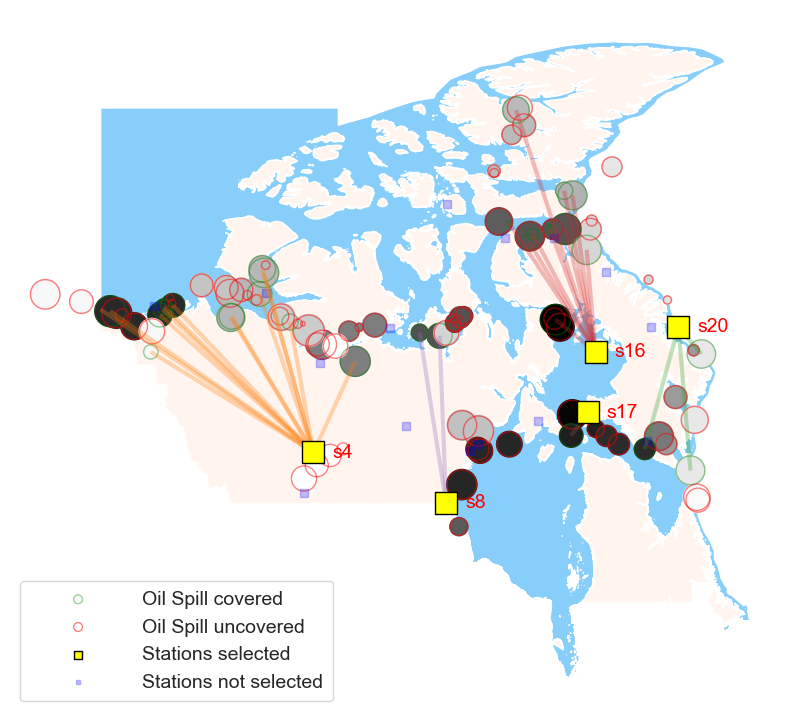

In [21]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s, current_vs_proposed)

## Table 4: Resource deployment from facilities

In [22]:

selected_st_name = list(select_1s.reset_index().level_0)
selected_st_name

['s16', 's4', 's17', 's8', 's20']

In [23]:
deploy_1s

o178  s4   i    157.0
      s8   i    157.0
      s16  i    157.0
      s17  i    157.0
      s20  i    157.0
                ...  
o78   s4   i     37.0
      s8   i     37.0
      s16  i     37.0
      s17  i     37.0
      s20  i     37.0
Length: 150, dtype: float64

In [24]:
deploy_df = pd.DataFrame(deploy_1s.reset_index())
deploy_df
#deploy_df.columns = ['St', 'os', 'rr','amount']
#print(deploy_df.columns)

,level_0,level_1,level_2,0
0,o178,s4,i,157.0
1,o178,s8,i,157.0
2,o178,s16,i,157.0
3,o178,s17,i,157.0
4,o178,s20,i,157.0
...,...,...,...,...
145,o78,s4,i,37.0
146,o78,s8,i,37.0
147,o78,s16,i,37.0
148,o78,s17,i,37.0


In [25]:
max(Distance_n.values())

1.0

In [26]:
selected_st_name.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [27]:
resource_deployment_from_facility = pd.DataFrame(columns=['M','C','I'])
for index, st in enumerate(selected_st_name):
    a = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'm'), 0].sum()
    b = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'c'), 0].sum()
    c = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'i'), 0].sum()
    resource_deployment_from_facility.loc[index] = [a,b,c]
    
resource_deployment_from_facility.index=selected_st_name
resource_deployment_from_facility

,M,C,I
s16,0.0,0.0,0.0
s4,0.0,0.0,0.0
s17,0.0,0.0,0.0
s8,0.0,0.0,0.0
s20,0.0,0.0,0.0


In [28]:
#deploy_1s
sum(Distance.values()) / len(Distance)
max(Distance.values())

82.62173596329828

In [29]:
display(select_1s)
#display(station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)])
display(spill_df)

s16  i    1.0
s4   i    1.0
s17  i    1.0
s8   i    1.0
s20  i    1.0
dtype: float64

,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o74,64.504219,-79.406021,8500,104.0
1,o98,73.858727,-77.062927,4820,23.0
2,o53,58.851135,-94.206932,3200,71.0
3,o178,69.455536,-123.856422,6160,35.0
4,o203,65.388885,-65.952179,5190,46.0
...,...,...,...,...,...
95,o207,61.278797,-114.416603,6480,7.0
96,o43,70.589783,-120.206131,5790,35.0
97,o192,68.705536,-134.233826,6430,10.0
98,o174,72.045486,-119.409912,800,35.0


In [30]:
selected_supply_stations = list(deploy_1s.reset_index().level_1.unique())
len(selected_supply_stations)#.shape[0]
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)].reset_index()
import matplotlib.pyplot as plt

In [31]:
#data_st_selected.loc[:, 'Station no.'][i] #+ 1

In [32]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

# Model
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, Cu_sor)

# Draw the network
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

NameError: name 'potential_station_data' is not defined

In [ ]:
#import model_analysis

In [ ]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [ ]:
import pandas as pd
df = pd.DataFrame()
#df['ll'] = list([2,10])
#df.loc[1]

In [ ]:
df

In [ ]:
assignment.columns

In [ ]:
assignment

In [ ]:
display(assignment)
display(deploy_1s)

In [ ]:
deploy_reset = deploy_1s.reset_index()
deploy_reset.columns = ['Station no.', 'Spill #', 'Resource Type', 'Quantity deployed']

In [ ]:
display(assignment)

In [ ]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt
unique_stations = assignment['Station no.'].unique()

fig, ax = plt.subplots()
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticLand.plot(ax=ax, color="seashell")

for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()
    d_m = pd.DataFrame(d1.loc[d1['Resource Type'] == 'm'].copy())
    d_c = d1.loc[d1['Resource Type'] == 'c'].copy()
    d_i = d1.loc[d1['Resource Type'] == 'i'].copy()

    new_list_m = []
    for r1 in range(d_m.shape[0]):
        new_list_m.append([(d_m.loc[r1, 'Spill_Longitude'], d_m.loc[r1, 'Spill_Latitude']), (d_m.loc[r1, 'St_Longitude'], d_m.loc[r1, 'St_Latitude'])])
        # d_m.loc[2, 'Spill_Longitude']
        # new_list_m.append([(d_m.Spill_Longitude[r1], d_m.Spill_Latitude[r1]), (d_m.St_Longitude[r1], d_m.St_Latitude[r1])])
        lc_m = mc.LineCollection(new_list_m, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dashed')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)

In [ ]:
d_m.loc[2, 'Spill_Longitude']

In [ ]:
d_m.Spill_Longitude[0]

In [ ]:
print(d_m.shape)
print(d1.shape) #.Spill_Longitude[1]
print(d_m.shape[0])
display(d1)
display(d_m)

In [ ]:
d_m
#df.loc[df['col1'] == value]

In [ ]:
assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()

# Model Configuration 2

## Fig5b

# Pareto Front


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_pareto_front = pd.read_excel('Outputs/pareto front.xlsx', sheet_name='pareto front2')
data_pareto_front

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
plt.savefig('Outputs/pareto_front.png', transparent=True)

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.scatter(data=data_pareto_front, x='Max', y='Min',
            alpha=0.5, edgecolors='black', s=200, color='r')
Max = data_pareto_front[['Max']]
Min = data_pareto_front[['Min']]
plt.plot(Max, Min,
            ls='--', alpha=0.5, color='r')
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
#plt.axis('off')
plt.savefig('Outputs/pareto_frontier_points.png', transparent=True)